In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier 
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('Dataset.csv', encoding='ISO-8859-1')
df = df.dropna()

In [4]:
df.head()

,topic,comments,label
0,1x IPTV WORLD PREMIUM|Active Connections: 141 ...,"Total Channels:2448LIVE Categories:SAWA PLUS, ...",1
1,x10 CRUNCHYROLL PREMIUM ACCOUNTS BE FAST!!!,DROP AÂ LIKE ORÂ REPORT Â Â Â Hidden ContentYo...,1
2,"â­AMAZON.DE REFUND UPTO 1,5Kâ¬â­ - âï¸FA...","I wanted to share this post for all, the name ...",1
3,SPOTIFY PREMIUM FAMILY INVITE [ONLY 3 SPOTS] F...,"IP CANADAADDRESS:Â 577 Route 105, Chelsea, QC ...",1
4,100x [KEY + Accounts] ExpressVPN (NOT CRACK)-(...,Hidden ContentYou'll be able to see the hidden...,1


In [5]:
y = df['label'].values

In [6]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [7]:
transformer = FeatureUnion([
                ('topic_tfidf', 
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['topic'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer())])),
                ('comments_tfidf', 
                  Pipeline([('extract_field', 
                              FunctionTransformer(lambda x: x['comments'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer())]))]) 

In [8]:
# https://www.etutorialspoint.com/index.php/386-tf-idf-tfidfvectorizer-tutorial-with-examples
# tfidf = TfidfVectorizer(decode_error='ignore')
# X = tfidf.fit_transform(df_all)
transformer = transformer.fit(df[['topic', 'comments']])
X = transformer.transform(df[['topic', 'comments']])

In [9]:
# https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
# count_vectorizer = CountVectorizer(decode_error='ignore')
# X = count_vectorizer.fit_transform(df['data'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [11]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

0.8988962472406181

In [12]:
nb.score(X_test, y_test)

0.8634598147594861

In [13]:
# Support vector machine 
svm = svm.SVC()
svm.fit(X_train, y_train)
svm.score(X_train, y_train)

0.9733627667402501

In [14]:
svm.score(X_test, y_test)

0.907977293098297

In [15]:
# Decison tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)

0.9977924944812362

In [16]:
dtc.score(X_test, y_test)

0.8807887660591575

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.9977924944812362

In [18]:
rfc.score(X_test, y_test)

0.8813863161039737

In [19]:
bc = BaggingClassifier()
bc.fit(X_train, y_train)
bc.score(X_train, y_train)

0.9873436350257543

In [20]:
bc.score(X_test, y_test)

0.8984164923812369

In [21]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab.score(X_train, y_train)

0.8869757174392936

In [22]:
ab.score(X_test, y_test)

0.8718255153869137

In [23]:
def visualize(label, data):
    words = ''
    for msg in df[df['label'] == label][data]:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

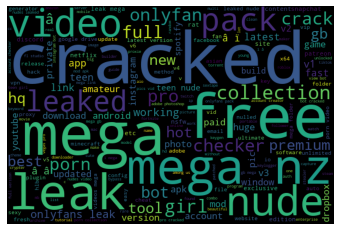

In [24]:
visualize(0, 'topic')

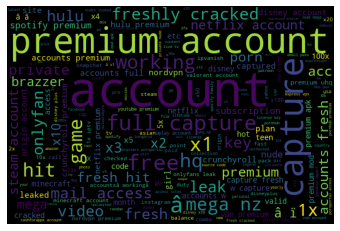

In [25]:
visualize(1, 'topic')

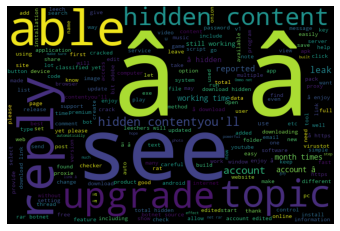

In [26]:
visualize(0, 'comments')

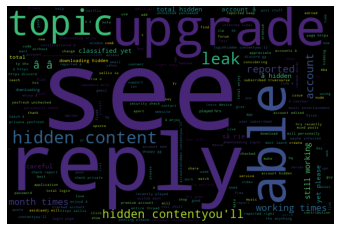

In [27]:
visualize(1, 'comments')